# <b> 1.  REQUIRED LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/1_OCCUPATION_TYPE(Fillna).csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(307292, 122)

In [ ]:
(df["OWN_CAR_AGE"].isnull().sum()/len(df)*100)

65.99358265102899

# <b>COLUMNS RELATED TO "OWN_CAR_AGE"

In [ ]:
df[["FLAG_OWN_CAR","CODE_GENDER","DAYS_BIRTH","DAYS_EMPLOYED","OWN_CAR_AGE","OCCUPATION_TYPE","CNT_FAM_MEMBERS"]]

,FLAG_OWN_CAR,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,N,M,9461,637,NaN,Laborers,1.0
1,N,F,16765,1188,NaN,Core staff,2.0
2,Y,M,19046,225,26.0,Laborers,1.0
3,N,F,19005,3039,NaN,Laborers,2.0
4,N,M,19932,3038,NaN,Core staff,1.0
...,...,...,...,...,...,...,...
307287,N,M,9327,236,NaN,Sales staff,1.0
307288,N,F,20775,12868,NaN,Cleaning staff,1.0
307289,N,F,14966,7921,NaN,Managers,1.0
307290,N,F,11961,4786,NaN,Laborers,2.0


## RELATIONSHIP BETWEEN <b>"FLAG_OWN_CAR"</b> and <b>"OWN_CAR_AGE"</b>

In [ ]:
value_counts=df["FLAG_OWN_CAR"].value_counts()/df.shape[0]
value_counts

N    0.65992
Y    0.34008
Name: FLAG_OWN_CAR, dtype: float64

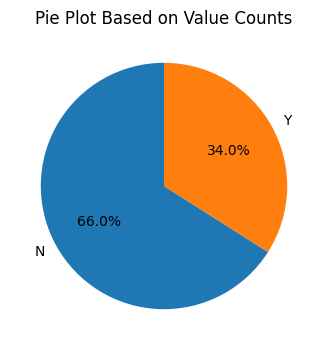

In [ ]:
plt.figure(figsize=(4, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Plot Based on Value Counts')
plt.show()

In [ ]:
null_val=df["OWN_CAR_AGE"].isnull().sum()*100/df.shape[0]
rem_val=100-null_val
null_val

65.99358265102899

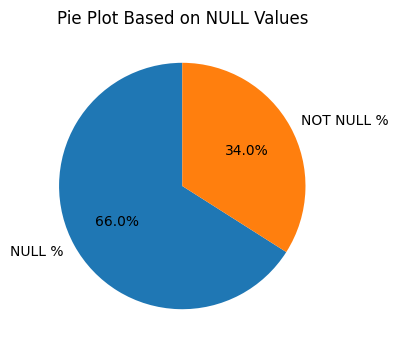

In [ ]:
plt.figure(figsize=(4, 4))
plt.pie([null_val,rem_val], labels=["NULL %","NOT NULL %"], autopct='%1.1f%%', startangle=90)
plt.title('Pie Plot Based on NULL Values')
plt.show()

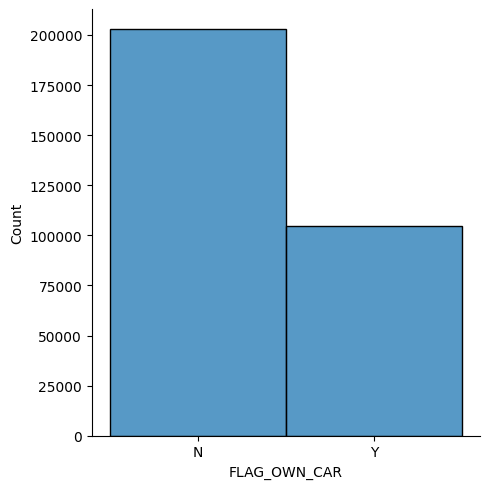

In [ ]:
sns.displot(df["FLAG_OWN_CAR"])

In [ ]:
# Convert null values to 0 and non-null values to 1
df['OWN_CAR_AGE_binary'] = df["OWN_CAR_AGE"].notnull().astype(int)

df[['OWN_CAR_AGE_binary','OWN_CAR_AGE']].head()

,OWN_CAR_AGE_binary,OWN_CAR_AGE
0,0,NaN
1,0,NaN
2,1,26.0
3,0,NaN
4,0,NaN


In [ ]:
df['OWN_CAR_AGE_binary'].value_counts()

0    202793
1    104499
Name: OWN_CAR_AGE_binary, dtype: int64

In [ ]:
mapping_dict = {'N': 0, 'Y': 1}

# Apply the mapping to the specified column
df["FLAG_OWN_CAR_binary"] = df["FLAG_OWN_CAR"].map(mapping_dict)

In [ ]:
df[["FLAG_OWN_CAR_binary","FLAG_OWN_CAR"]].head()

,FLAG_OWN_CAR_binary,FLAG_OWN_CAR
0,0,N
1,0,N
2,1,Y
3,0,N
4,0,N


In [ ]:
df["FLAG_OWN_CAR_binary"].value_counts()

0    202788
1    104504
Name: FLAG_OWN_CAR_binary, dtype: int64

In [ ]:
df['difference'] = df["FLAG_OWN_CAR_binary"] - df['OWN_CAR_AGE_binary']

In [ ]:
df[df['difference'] != 0][["FLAG_OWN_CAR","OWN_CAR_AGE","CODE_GENDER","DAYS_BIRTH","DAYS_EMPLOYED","OCCUPATION_TYPE","CNT_FAM_MEMBERS"]]

,FLAG_OWN_CAR,OWN_CAR_AGE,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS
30875,Y,NaN,M,16030,1889,Managers,2.0
181100,Y,NaN,F,18667,4442,Medicine staff,2.0
217391,Y,NaN,M,13502,2256,Drivers,2.0
229703,Y,NaN,F,13021,944,Accountants,3.0
236702,Y,NaN,F,10573,180,High skill tech staff,2.0


5 columns are having people are having car but their car age is not given

## <b>USING REGRESSION FOR IMPUTATION

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['FLAG_OWN_CAR_encoded'] = label_encoder.fit_transform(df['FLAG_OWN_CAR'])
df['CODE_GENDER_encoded'] = label_encoder.fit_transform(df['CODE_GENDER'])
df['OCCUPATION_TYPE_encoded'] = label_encoder.fit_transform(df['OCCUPATION_TYPE'])

In [ ]:
import statsmodels.api as sm
filtered_df = df[df['OWN_CAR_AGE'].notnull()][["FLAG_OWN_CAR_encoded","OWN_CAR_AGE","CODE_GENDER_encoded","DAYS_BIRTH","DAYS_EMPLOYED","OCCUPATION_TYPE_encoded","CNT_FAM_MEMBERS",'difference']]

In [ ]:
train_set=filtered_df[filtered_df['difference'] == 0][["FLAG_OWN_CAR_encoded","OWN_CAR_AGE","CODE_GENDER_encoded","DAYS_BIRTH","DAYS_EMPLOYED","OCCUPATION_TYPE_encoded","CNT_FAM_MEMBERS"]]
train_set

,FLAG_OWN_CAR_encoded,OWN_CAR_AGE,CODE_GENDER_encoded,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE_encoded,CNT_FAM_MEMBERS
2,1,26.0,1,19046,225,8,1.0
6,1,17.0,0,13778,3130,0,3.0
7,1,8.0,1,18850,449,10,2.0
13,1,23.0,1,14086,3028,4,3.0
15,1,17.0,1,8728,1157,8,1.0
...,...,...,...,...,...,...,...
307273,1,2.0,1,20965,1618,14,2.0
307275,1,15.0,1,14958,6573,4,3.0
307276,1,2.0,1,20922,7438,6,2.0
307278,1,0.0,0,16679,1222,14,2.0


In [ ]:
X=train_set.drop("OWN_CAR_AGE",axis=1)
Y=train_set["OWN_CAR_AGE"]

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            OWN_CAR_AGE   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     10.60
Date:                Fri, 16 Feb 2024   Prob (F-statistic):           3.39e-10
Time:                        19:48:36   Log-Likelihood:            -4.0746e+05
No. Observations:              104499   AIC:                         8.149e+05
Df Residuals:                  104493   BIC:                         8.150e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
FLAG_OWN_CAR_encoded      

In [ ]:
model.pvalues<0.05

FLAG_OWN_CAR_encoded        True
CODE_GENDER_encoded        False
DAYS_BIRTH                  True
DAYS_EMPLOYED               True
OCCUPATION_TYPE_encoded    False
CNT_FAM_MEMBERS             True
dtype: bool

Significat features include own car, days_birth,days_employed,count of family members

In [ ]:
test_set=df[df['difference'] != 0][["FLAG_OWN_CAR_encoded","OWN_CAR_AGE","CODE_GENDER_encoded","DAYS_BIRTH","DAYS_EMPLOYED","OCCUPATION_TYPE_encoded","CNT_FAM_MEMBERS"]]
test_set

,FLAG_OWN_CAR_encoded,OWN_CAR_AGE,CODE_GENDER_encoded,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE_encoded,CNT_FAM_MEMBERS
30875,1,NaN,1,16030,1889,10,2.0
181100,1,NaN,0,18667,4442,11,2.0
217391,1,NaN,1,13502,2256,4,2.0
229703,1,NaN,0,13021,944,0,3.0
236702,1,NaN,0,10573,180,6,2.0


In [ ]:
new_X=test_set.drop("OWN_CAR_AGE",axis=1)
new_Y=test_set["OWN_CAR_AGE"]

In [ ]:
test_set["OWN_CAR_AGE"]= model.predict(sm.add_constant(new_X))

In [ ]:
test_set

,FLAG_OWN_CAR_encoded,OWN_CAR_AGE,CODE_GENDER_encoded,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE_encoded,CNT_FAM_MEMBERS
30875,1,11.978041,1,16030,1889,10,2.0
181100,1,12.085977,0,18667,4442,11,2.0
217391,1,12.114612,1,13502,2256,4,2.0
229703,1,11.964293,0,13021,944,0,3.0
236702,1,12.290594,0,10573,180,6,2.0


In [ ]:
df[df['difference'] != 0]["OWN_CAR_AGE"]=test_set["OWN_CAR_AGE"]

<ipython-input-96-7ea84efe3db8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['difference'] != 0]["OWN_CAR_AGE"]=test_set["OWN_CAR_AGE"]


In [ ]:
df.loc[df['difference'] != 0, "OWN_CAR_AGE"] = test_set["OWN_CAR_AGE"]

In [ ]:
df[df['difference'] != 0]["OWN_CAR_AGE"].isnull().sum()

0

In [ ]:
df['OWN_CAR_AGE'] = df['OWN_CAR_AGE'].fillna(0)

In [ ]:
df.shape

(307292, 128)

In [ ]:
columns_to_drop = ["FLAG_OWN_CAR_encoded","CODE_GENDER_encoded","OCCUPATION_TYPE_encoded",'difference',"FLAG_OWN_CAR_binary",'OWN_CAR_AGE_binary']
df = df.drop(columns=columns_to_drop)

In [ ]:
df.shape

(307292, 122)

In [ ]:
df.to_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/2_OWN_CAR_AGE(fillna).csv", index=False)